# Task 1 - Unsupervised learning
dataset link: https://www.kaggle.com/datasets/rohan0301/unsupervised-learning-on-country-data


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
countries = pd.read_csv('Country-data.csv')

In [3]:
countries

country  child_mort  exports  health  imports  income  \
0            Afghanistan        90.2     10.0    7.58     44.9    1610   
1                Albania        16.6     28.0    6.55     48.6    9930   
2                Algeria        27.3     38.4    4.17     31.4   12900   
3                 Angola       119.0     62.3    2.85     42.9    5900   
4    Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   
..                   ...         ...      ...     ...      ...     ...   
162              Vanuatu        29.2     46.6    5.25     52.7    2950   
163            Venezuela        17.1     28.5    4.91     17.6   16500   
164              Vietnam        23.3     72.0    6.84     80.2    4490   
165                Yemen        56.3     30.0    5.18     34.4    4480   
166               Zambia        83.1     37.0    5.89     30.9    3280   

     inflation  life_expec  total_fer   gdpp  
0         9.44        56.2       5.82    553  
1         4.49        76.3       1.65   4090  
2        16.10        76.5       2.89   4460  
3        22.40        60.1       6.16   3530  
4         1.44        76.8       2.13  12200  
..         ...         ...        ...    ...  
162       2.62        63.0       3.50   2970  
163      45.90        75.4       2.47  13500  
164      12.10        73.1       1.95   1310  
165      23.60        67.5       4.67   1310  
166      14.00        52.0       5.40   1460  

[167 rows x 10 columns]

# EDA

In [4]:
countries.describe()

child_mort     exports      health     imports         income  \
count  167.000000  167.000000  167.000000  167.000000     167.000000   
mean    38.270060   41.108976    6.815689   46.890215   17144.688623   
std     40.328931   27.412010    2.746837   24.209589   19278.067698   
min      2.600000    0.109000    1.810000    0.065900     609.000000   
25%      8.250000   23.800000    4.920000   30.200000    3355.000000   
50%     19.300000   35.000000    6.320000   43.300000    9960.000000   
75%     62.100000   51.350000    8.600000   58.750000   22800.000000   
max    208.000000  200.000000   17.900000  174.000000  125000.000000   

        inflation  life_expec   total_fer           gdpp  
count  167.000000  167.000000  167.000000     167.000000  
mean     7.781832   70.555689    2.947964   12964.155689  
std     10.570704    8.893172    1.513848   18328.704809  
min     -4.210000   32.100000    1.150000     231.000000  
25%      1.810000   65.300000    1.795000    1330.000000  
50%      5.390000   73.100000    2.410000    4660.000000  
75%     10.750000   76.800000    3.880000   14050.000000  
max    104.000000   82.800000    7.490000  105000.000000

In [5]:
countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [6]:
countries.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [7]:
#group countries based on income/ GNI
def income_level(a):
    if a <= 1350:
        return 'Low-income economy'
    elif a <= 4466:
        return 'Lower-middle income economy'
    elif a <=13844:
        return 'Upper-middle income economy'
    else:
        return 'High-income economy'
countries['income_level'] = countries['income'].apply(income_level)

<AxesSubplot:xlabel='income_level', ylabel='count'>

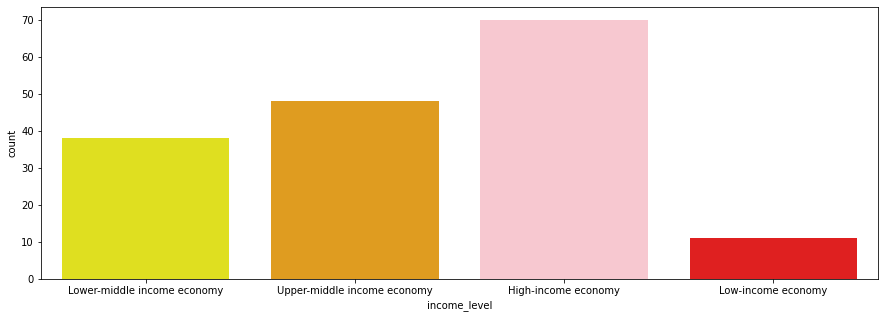

In [8]:
plt.subplots(figsize=(15,5))
sns.countplot(x='income_level',data=countries,palette=['yellow', 'orange','pink', 'red'])

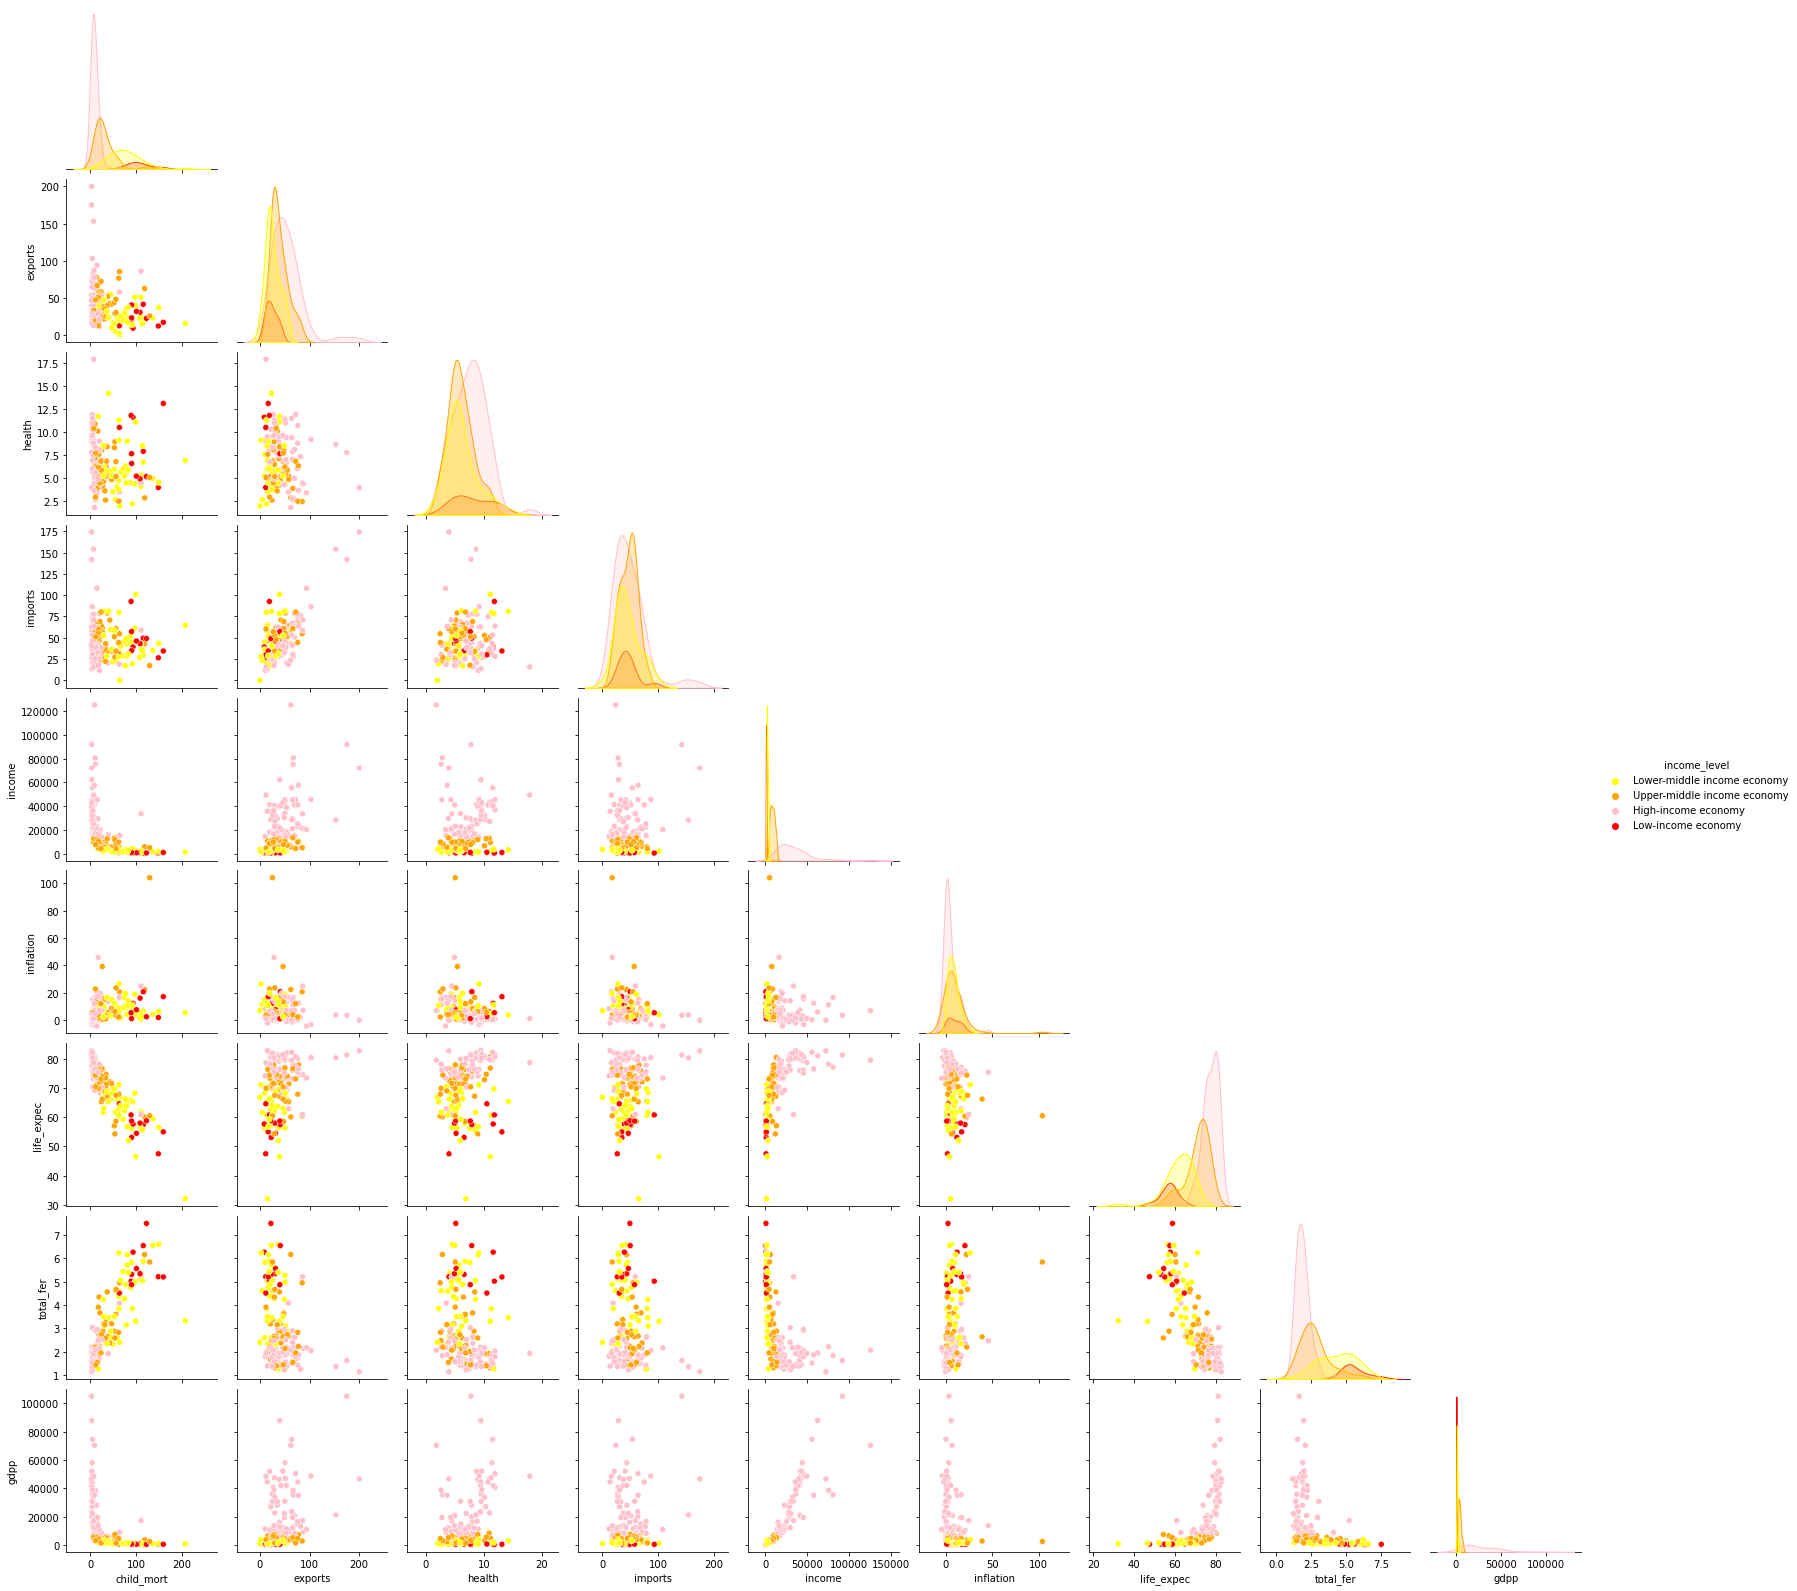

In [9]:
sns.pairplot(countries,corner=True,hue='income_level',palette=['yellow','orange', 'pink', 'red'])

<AxesSubplot:xlabel='child_mort', ylabel='income_level'>

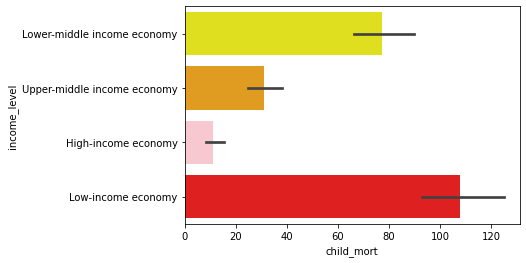

In [10]:
sns.barplot(data=countries,x = 'child_mort',y='income_level',palette=['yellow', 'orange','pink', 'red'])

<AxesSubplot:xlabel='total_fer', ylabel='income_level'>

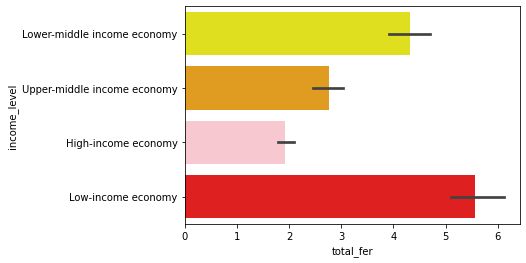

In [11]:
sns.barplot(data=countries,x = 'total_fer',y='income_level',palette=['yellow', 'orange','pink', 'red'])

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of exports of countries with high inflation')

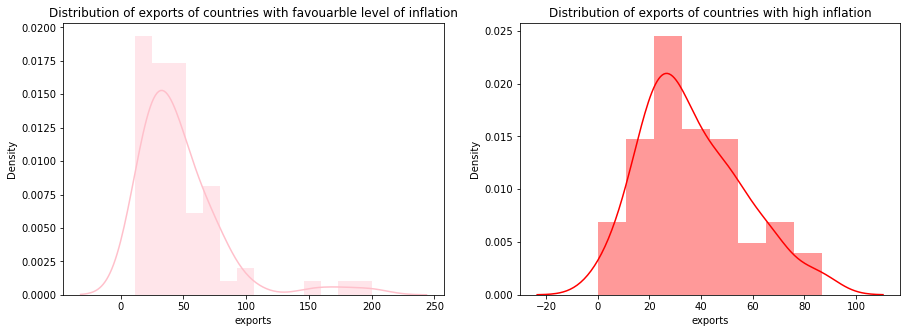

In [12]:
fig = plt.figure(figsize=(15,5))

ax = fig.add_subplot(121)
sns.distplot(countries[(countries.inflation < 4)]["exports"], color='pink', ax = ax )
ax.set_title('Distribution of exports of countries with favouarble level of inflation')

ax = fig.add_subplot(122)
sns.distplot(countries[(countries.inflation >=4)]['exports'], color='red', ax = ax)
ax.set_title('Distribution of exports of countries with high inflation')

Text(0.5, 1.0, 'Top 5 countries with lowest child mortality')

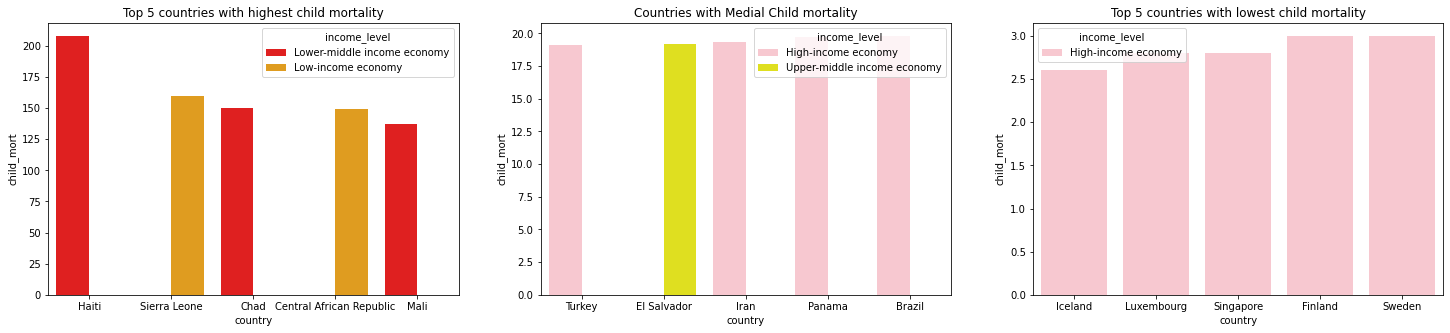

In [13]:
plt.figure(figsize=(25,5))
plt.subplot(1,3,1)
sns.barplot(x = 'country',y = 'child_mort', data = countries.sort_values(ascending = False,by = 'child_mort').iloc[:5],hue='income_level',palette=['red', 'orange','pink', 'yellow'])
plt.title('Top 5 countries with highest child mortality')
plt.subplot(1,3,2)
sns.barplot(x = 'country',y = 'child_mort', data = countries.sort_values(ascending = True,by = 'child_mort').iloc[81:86],hue='income_level',palette=['pink', 'yellow','orange', 'red'])
plt.title('Countries with Medial Child mortality')
plt.subplot(1,3,3)
sns.barplot(x = 'country',y = 'child_mort', data = countries.sort_values(ascending = True,by = 'child_mort').iloc[:5],hue='income_level',palette=['pink', 'orange','red', 'yellow'])
plt.title('Top 5 countries with lowest child mortality')

Text(0.5, 1.0, 'Countries with lowest exports %')

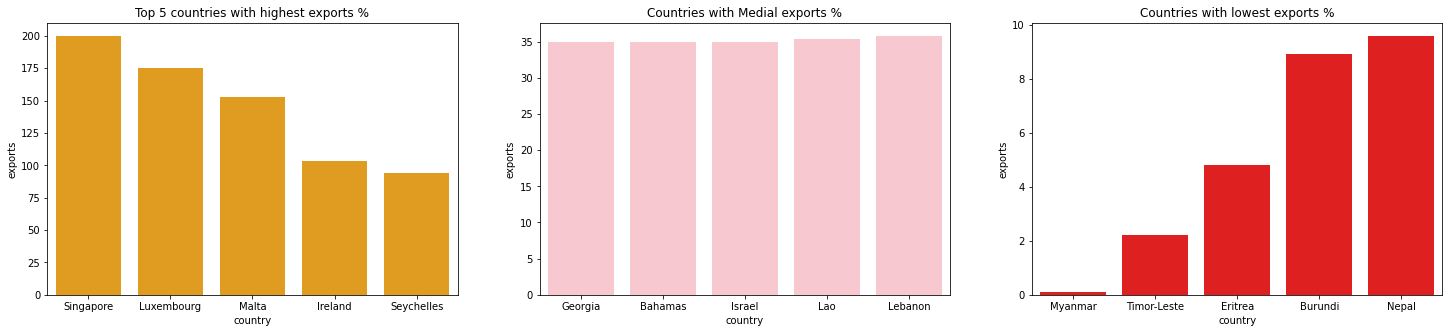

In [14]:
plt.figure(figsize=(25,5))
plt.subplot(1,3,1)
sns.barplot(x = 'country',y = 'exports', data = countries.sort_values(ascending = False,by = 'exports').iloc[:5],color='orange')
plt.title('Top 5 countries with highest exports %')
plt.subplot(1,3,2)
sns.barplot(x = 'country',y = 'exports', data = countries.sort_values(ascending = True,by = 'exports').iloc[81:86],color='pink')
plt.title('Countries with Medial exports %')
plt.subplot(1,3,3)
sns.barplot(x = 'country',y = 'exports', data = countries.sort_values(ascending = True,by = 'exports').iloc[:5],color='red')
plt.title('Countries with lowest exports %')

Text(0.5, 1.0, 'Countries with lowest imports %')

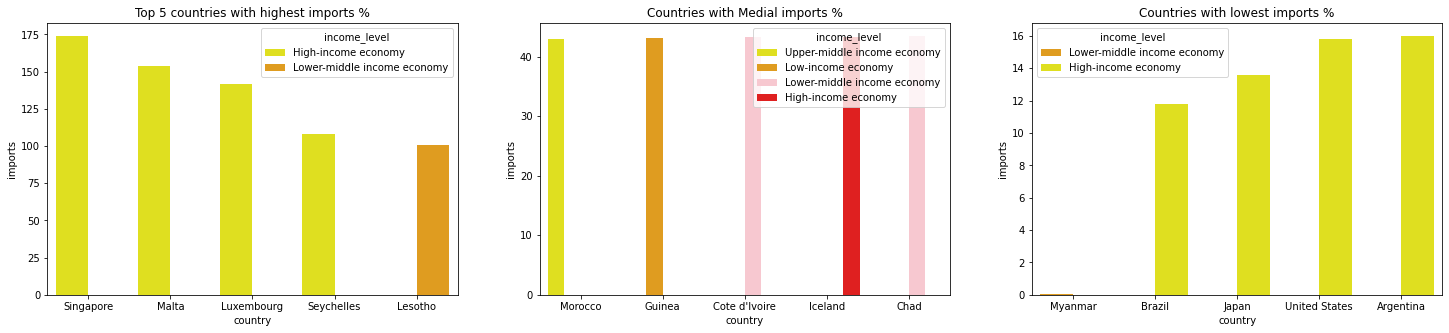

In [15]:
plt.figure(figsize=(25,5))
plt.subplot(1,3,1)
sns.barplot(x = 'country',y = 'imports', data = countries.sort_values(ascending = False,by = 'imports').iloc[:5],hue='income_level',palette=['yellow', 'orange','pink', 'red'])
plt.title('Top 5 countries with highest imports %')
plt.subplot(1,3,2)
sns.barplot(x = 'country',y = 'imports', data = countries.sort_values(ascending = True,by = 'imports').iloc[81:86],hue='income_level',palette=['yellow', 'orange','pink', 'red'])
plt.title('Countries with Medial imports %')
plt.subplot(1,3,3)
sns.barplot(x = 'country',y = 'imports', data = countries.sort_values(ascending = True,by = 'imports').iloc[:5],hue='income_level',palette=['orange', 'yellow','pink', 'red'])
plt.title('Countries with lowest imports %')

Text(0.5, 1.0, 'Countries with lowest life expectancy')

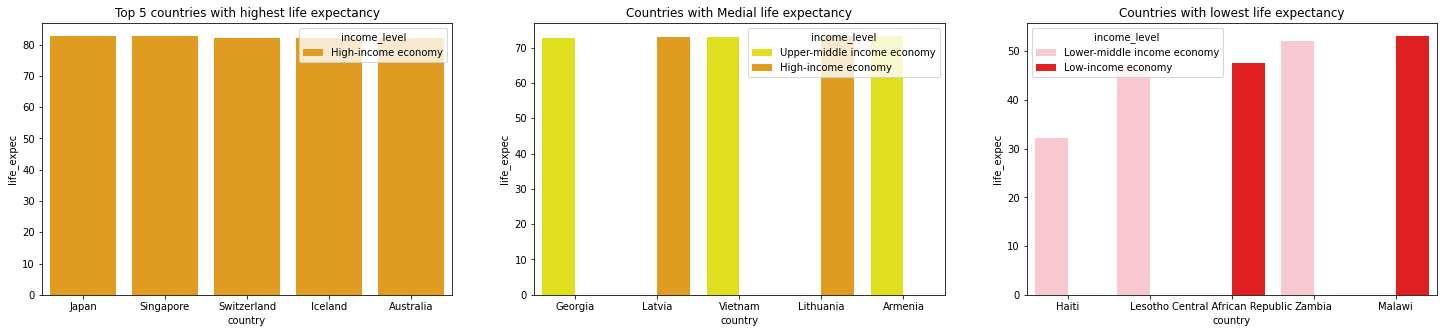

In [16]:
plt.figure(figsize=(25,5))
plt.subplot(1,3,1)
sns.barplot(x = 'country',y = 'life_expec', data = countries.sort_values(ascending = False,by = 'life_expec').iloc[:5],hue='income_level',palette=['orange', 'yellow','pink', 'red'])
plt.title('Top 5 countries with highest life expectancy')
plt.subplot(1,3,2)
sns.barplot(x = 'country',y = 'life_expec', data = countries.sort_values(ascending = True,by = 'life_expec').iloc[81:86],hue='income_level',palette=['yellow','orange','pink', 'red'])
plt.title('Countries with Medial life expectancy')
plt.subplot(1,3,3)
sns.barplot(x = 'country',y = 'life_expec', data = countries.sort_values(ascending = True,by = 'life_expec').iloc[:5],hue='income_level',palette=['pink', 'red','yellow', 'orange'])
plt.title('Countries with lowest life expectancy')

<AxesSubplot:>

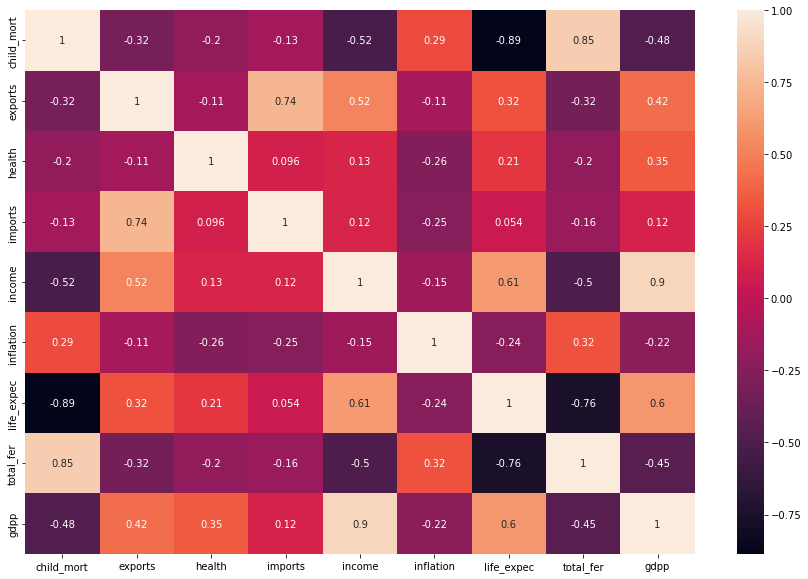

In [17]:
plt.subplots(figsize=(15,10))
sns.heatmap(countries.corr(), annot=True)

# PCA

In [18]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


pca_cols = countries[['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']]

scaler = StandardScaler()
scaled_data = scaler.fit_transform(pca_cols)


pca = PCA(n_components=9)
pca.fit(scaled_data)
exp = pca.explained_variance_ratio_
print(exp)

[0.4595174  0.17181626 0.13004259 0.11053162 0.07340211 0.02484235
 0.0126043  0.00981282 0.00743056]


Text(0, 0.5, 'Cumulative explained variance')

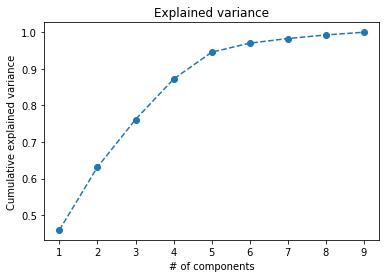

In [19]:
plt.plot(range(1, len(pca_cols.columns)+1), 
         pca.explained_variance_ratio_.cumsum(),
         marker='o', linestyle='--')
plt.title("Explained variance")
plt.xlabel("# of components")
plt.ylabel("Cumulative explained variance")

In [20]:
#5 PCA components will be selected
pca_data = pca.transform(scaled_data)

for i in range(5):
    pca_cols[f'pca_component_{i+1}'] = pca_data[:, i]

pca_cols.head()

C:\Users\hp\AppData\Local\Temp\ipykernel_28192\1525026791.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pca_cols[f'pca_component_{i+1}'] = pca_data[:, i]


child_mort  exports  health  imports  income  inflation  life_expec  \
0        90.2     10.0    7.58     44.9    1610       9.44        56.2   
1        16.6     28.0    6.55     48.6    9930       4.49        76.3   
2        27.3     38.4    4.17     31.4   12900      16.10        76.5   
3       119.0     62.3    2.85     42.9    5900      22.40        60.1   
4        10.3     45.5    6.03     58.9   19100       1.44        76.8   

   total_fer   gdpp  pca_component_1  pca_component_2  pca_component_3  \
0       5.82    553        -2.913025         0.095621        -0.718118   
1       1.65   4090         0.429911        -0.588156        -0.333486   
2       2.89   4460        -0.285225        -0.455174         1.221505   
3       6.16   3530        -2.932423         1.695555         1.525044   
4       2.13  12200         1.033576         0.136659        -0.225721   

   pca_component_4  pca_component_5  
0         1.005255        -0.158310  
1        -1.161059         0.174677  
2        -0.868115         0.156475  
3         0.839625        -0.273209  
4        -0.847063        -0.193007

<AxesSubplot:>

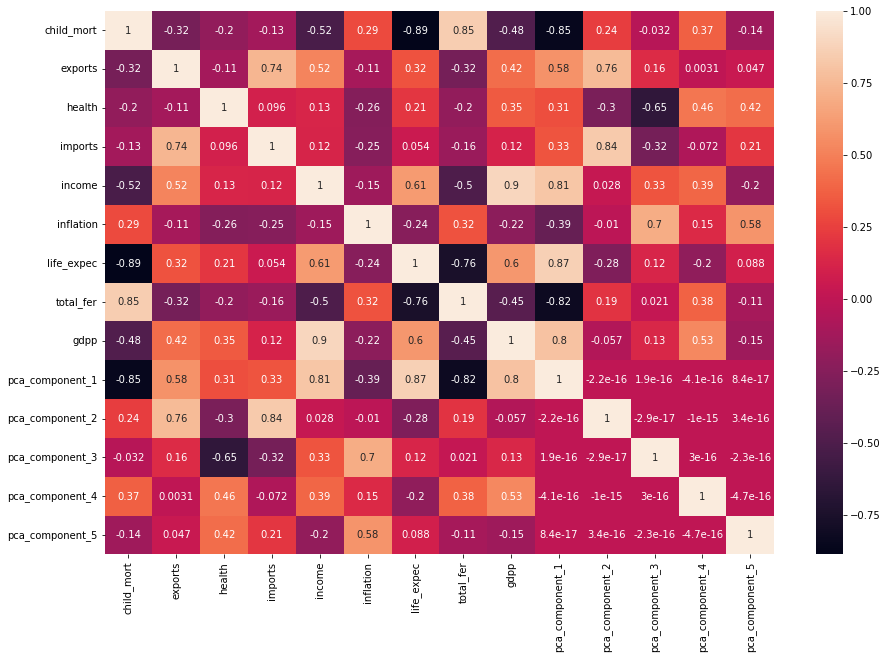

In [21]:
plt.subplots(figsize=(15,10))
sns.heatmap(pca_cols.corr(),annot= True)

In [22]:
pca_cols = pca_cols.drop(['child_mort','exports','health','imports','income','life_expec','total_fer','gdpp','inflation'],axis=1)

# K-means clustering

In [23]:
#identify optimal number of clusters
from sklearn.cluster import KMeans
int_list = []
for i in range(1,10):
    model = KMeans(i)
    model.fit(pca_cols)
    int_list.append(model.inertia_)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0, 0.5, 'Inertia')

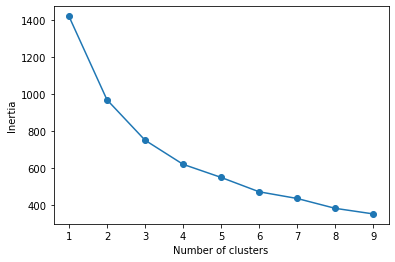

In [24]:
n_clusters = range(1,10)
plt.plot(n_clusters, int_list,marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [25]:
 # no. of clusters = 3
model = KMeans(3)
model.fit(pca_cols)

KMeans(n_clusters=3)

In [26]:
clusters = model.predict(pca_cols)
pca_cols['cluster'] = clusters

In [27]:
countries['cluster']= pca_cols['cluster']
countries.head()

country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp                 income_level  \
0       9.44        56.2       5.82    553  Lower-middle income economy   
1       4.49        76.3       1.65   4090  Upper-middle income economy   
2      16.10        76.5       2.89   4460  Upper-middle income economy   
3      22.40        60.1       6.16   3530  Upper-middle income economy   
4       1.44        76.8       2.13  12200          High-income economy   

   cluster  
0        1  
1        2  
2        2  
3        1  
4        2

In [28]:
countries.groupby('cluster',as_index=False).mean()

cluster  child_mort    exports    health    imports        income  \
0        0    5.000000  58.738889  8.807778  51.491667  45672.222222   
1        1   92.961702  29.151277  6.388511  42.323404   3942.404255   
2        2   21.927381  40.243917  6.200952  47.473404  12305.595238   

   inflation  life_expec  total_fer          gdpp  
0   2.671250   80.127778   1.752778  42494.444444  
1  12.019681   59.187234   5.008085   1922.382979  
2   7.600905   72.814286   2.307500   6486.452381

<AxesSubplot:xlabel='cluster', ylabel='gdpp'>

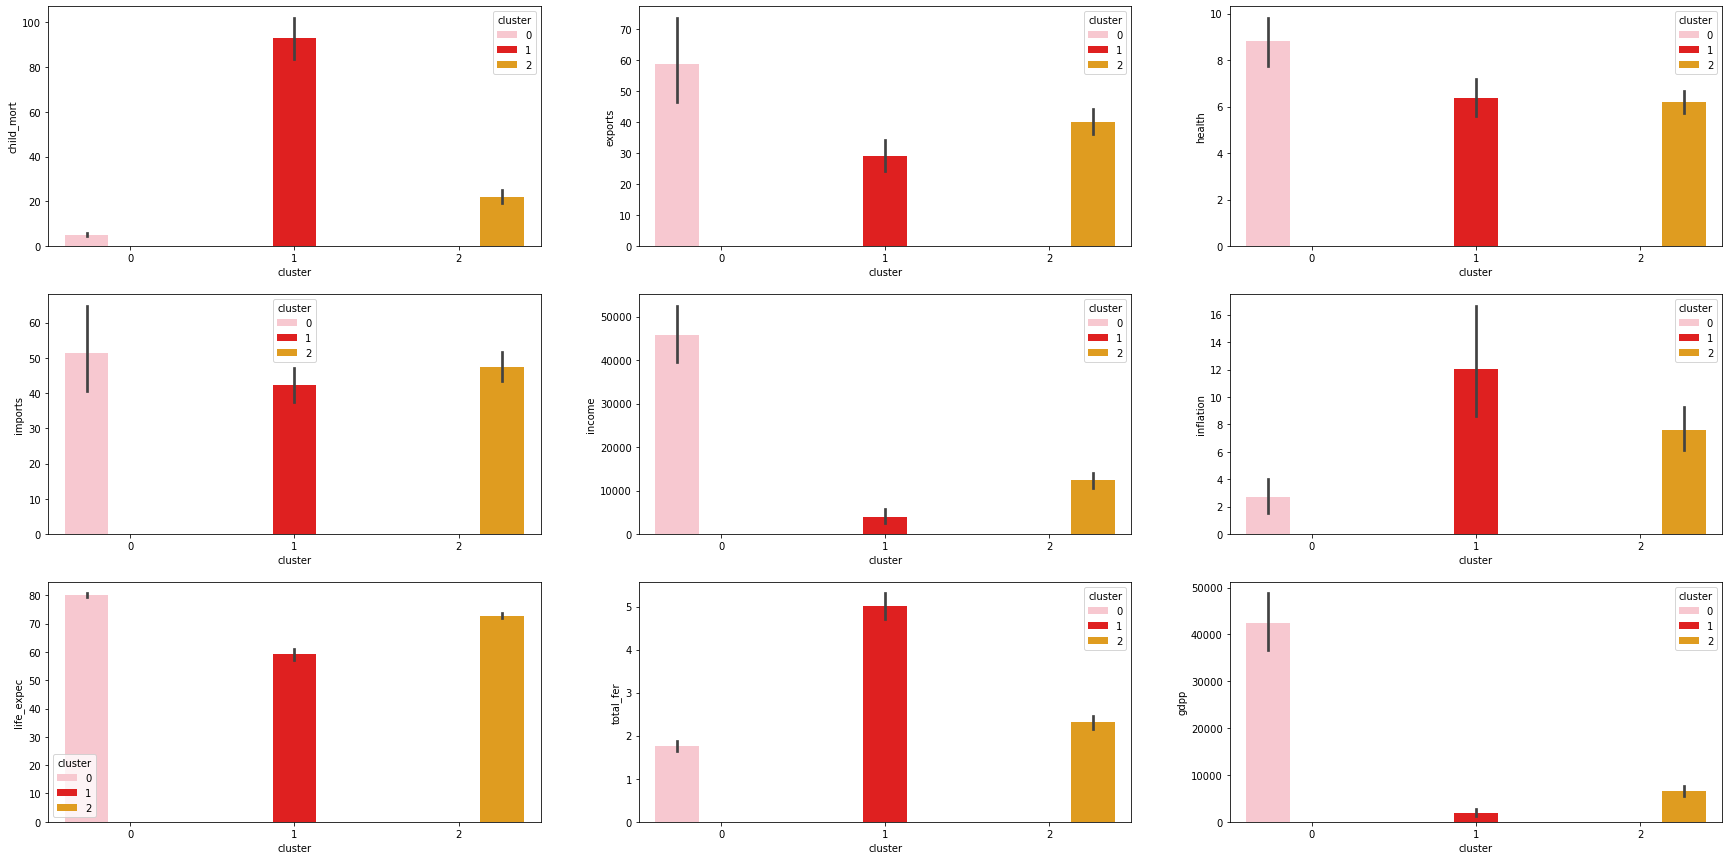

In [29]:
plt.figure(figsize=(30,15))
plt.subplot(3,3,1)
sns.barplot(x = 'cluster',y = 'child_mort', data = countries,hue='cluster',palette=['pink','red','orange'])
plt.subplot(3,3,2)
sns.barplot(x = 'cluster',y = 'exports', data = countries,hue='cluster',palette=['pink','red','orange'])
plt.subplot(3,3,3)
sns.barplot(x = 'cluster',y = 'health', data = countries,hue='cluster',palette=['pink','red','orange'])
plt.subplot(3,3,4)
sns.barplot(x = 'cluster',y = 'imports', data = countries,hue='cluster',palette=['pink','red','orange'])
plt.subplot(3,3,5)
sns.barplot(x = 'cluster',y = 'income', data = countries,hue='cluster',palette=['pink','red','orange'])
plt.subplot(3,3,6)
sns.barplot(x = 'cluster',y = 'inflation', data = countries,hue='cluster',palette=['pink','red','orange'])
plt.subplot(3,3,7)
sns.barplot(x = 'cluster',y = 'life_expec', data = countries,hue='cluster',palette=['pink','red','orange'])
plt.subplot(3,3,8)
sns.barplot(x = 'cluster',y = 'total_fer', data = countries,hue='cluster',palette=['pink','red','orange'])
plt.subplot(3,3,9)
sns.barplot(x = 'cluster',y = 'gdpp', data = countries,hue='cluster',palette=['pink','red','orange'])

In [30]:
#2 : No Help Needed
#1 : Help Needed
#0 : Might Need Help
countries['cluster'] = countries['cluster'].replace({ 0:"Might Need help", 1:"Help Needed",2: "No Help Needed"})
countries.head()

country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp                 income_level  \
0       9.44        56.2       5.82    553  Lower-middle income economy   
1       4.49        76.3       1.65   4090  Upper-middle income economy   
2      16.10        76.5       2.89   4460  Upper-middle income economy   
3      22.40        60.1       6.16   3530  Upper-middle income economy   
4       1.44        76.8       2.13  12200          High-income economy   

          cluster  
0     Help Needed  
1  No Help Needed  
2  No Help Needed  
3     Help Needed  
4  No Help Needed

In [31]:
#plot countries on a world map(This code has to be run for the map to show)
import plotly.express as px
fig = px.choropleth(countries[['country','cluster']],
                    locationmode = 'country names',
                    locations = 'country',
                    color = 'cluster',  
                    color_discrete_map = {'No Help Needed': 'pink',
                                          'Help Needed':'red',
                                          'Might Need help':'orange'})

fig.update_layout(
        margin = dict(
                l=0,
                r=0,
                b=0,
                t=0,
                pad=2,
            ), )
fig.show()

# Task 2 -  Regression
dataset link:https://www.kaggle.com/datasets/hellbuoy/car-price-prediction


In [32]:
cars = pd.read_csv('CarPrice_Assignment.csv')

In [33]:
cars

car_ID  symboling                   CarName fueltype aspiration  \
0         1          3        alfa-romero giulia      gas        std   
1         2          3       alfa-romero stelvio      gas        std   
2         3          1  alfa-romero Quadrifoglio      gas        std   
3         4          2               audi 100 ls      gas        std   
4         5          2                audi 100ls      gas        std   
..      ...        ...                       ...      ...        ...   
200     201         -1           volvo 145e (sw)      gas        std   
201     202         -1               volvo 144ea      gas      turbo   
202     203         -1               volvo 244dl      gas        std   
203     204         -1                 volvo 246   diesel      turbo   
204     205         -1               volvo 264gl      gas      turbo   

    doornumber      carbody drivewheel enginelocation  wheelbase  ...  \
0          two  convertible        rwd          front       88.6  ...   
1          two  convertible        rwd          front       88.6  ...   
2          two    hatchback        rwd          front       94.5  ...   
3         four        sedan        fwd          front       99.8  ...   
4         four        sedan        4wd          front       99.4  ...   
..         ...          ...        ...            ...        ...  ...   
200       four        sedan        rwd          front      109.1  ...   
201       four        sedan        rwd          front      109.1  ...   
202       four        sedan        rwd          front      109.1  ...   
203       four        sedan        rwd          front      109.1  ...   
204       four        sedan        rwd          front      109.1  ...   

     enginesize  fuelsystem  boreratio  stroke compressionratio horsepower  \
0           130        mpfi       3.47    2.68              9.0        111   
1           130        mpfi       3.47    2.68              9.0        111   
2           152        mpfi       2.68    3.47              9.0        154   
3           109        mpfi       3.19    3.40             10.0        102   
4           136        mpfi       3.19    3.40              8.0        115   
..          ...         ...        ...     ...              ...        ...   
200         141        mpfi       3.78    3.15              9.5        114   
201         141        mpfi       3.78    3.15              8.7        160   
202         173        mpfi       3.58    2.87              8.8        134   
203         145         idi       3.01    3.40             23.0        106   
204         141        mpfi       3.78    3.15              9.5        114   

     peakrpm citympg  highwaympg    price  
0       5000      21          27  13495.0  
1       5000      21          27  16500.0  
2       5000      19          26  16500.0  
3       5500      24          30  13950.0  
4       5500      18          22  17450.0  
..       ...     ...         ...      ...  
200     5400      23          28  16845.0  
201     5300      19          25  19045.0  
202     5500      18          23  21485.0  
203     4800      26          27  22470.0  
204     5400      19          25  22625.0  

[205 rows x 26 columns]

In [34]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [35]:
cars = cars.drop('car_ID',axis=1)

# EDA

In [36]:
#split car names into brand and model
cars_names = cars['CarName'].str.split(' ',n=1,expand=True)

In [37]:
cars = pd.concat([cars,cars_names],axis=1)

In [38]:
cars = cars.rename(columns={ 0:"Car_brand", 1:"Car_name"})
cars.head()

symboling                   CarName fueltype aspiration doornumber  \
0          3        alfa-romero giulia      gas        std        two   
1          3       alfa-romero stelvio      gas        std        two   
2          1  alfa-romero Quadrifoglio      gas        std        two   
3          2               audi 100 ls      gas        std       four   
4          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  carlength  ...  \
0  convertible        rwd          front       88.6      168.8  ...   
1  convertible        rwd          front       88.6      168.8  ...   
2    hatchback        rwd          front       94.5      171.2  ...   
3        sedan        fwd          front       99.8      176.6  ...   
4        sedan        4wd          front       99.4      176.6  ...   

   boreratio  stroke  compressionratio horsepower peakrpm  citympg highwaympg  \
0       3.47    2.68               9.0        111    5000       21         27   
1       3.47    2.68               9.0        111    5000       21         27   
2       2.68    3.47               9.0        154    5000       19         26   
3       3.19    3.40              10.0        102    5500       24         30   
4       3.19    3.40               8.0        115    5500       18         22   

     price    Car_brand      Car_name  
0  13495.0  alfa-romero        giulia  
1  16500.0  alfa-romero       stelvio  
2  16500.0  alfa-romero  Quadrifoglio  
3  13950.0         audi        100 ls  
4  17450.0         audi         100ls  

[5 rows x 27 columns]

In [39]:
cars["Car_brand"].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [40]:
cars['Car_brand'] = cars['Car_brand'].replace({'maxda': 'mazda', 'nissan': 'Nissan', 'porcshce': 'porsche', 'toyouta': 'toyota', 
             
                                               'vokswagen': 'volkswagen', 'vw': 'volkswagen'})

<AxesSubplot:xlabel='Car_brand', ylabel='count'>

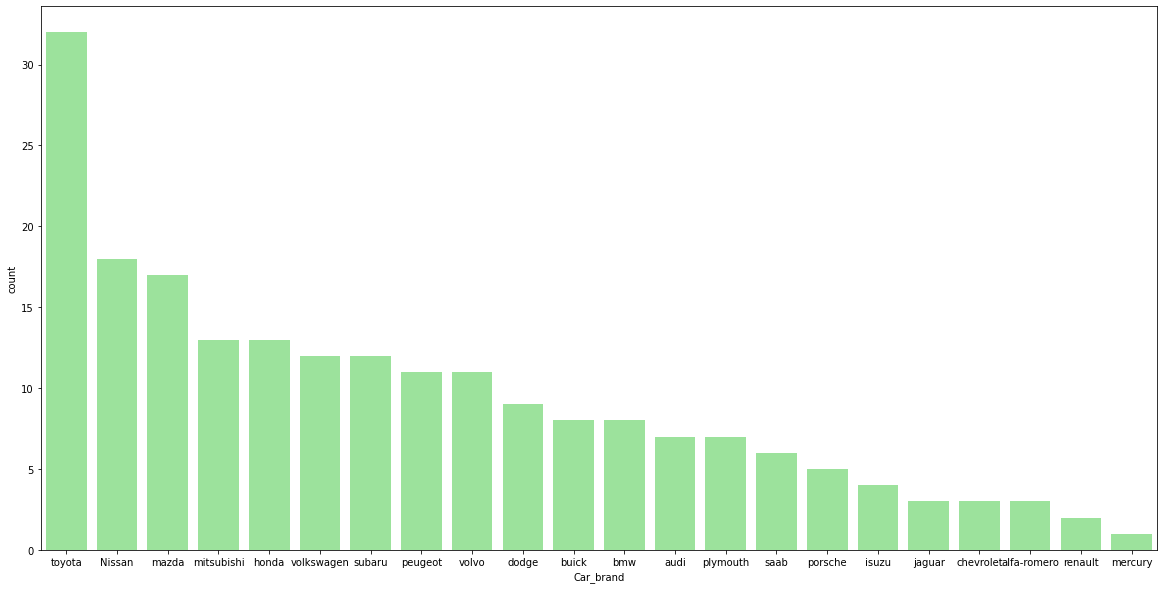

In [41]:
plt.subplots(figsize=(20,10))
sns.countplot(x='Car_brand',data = cars, order=cars['Car_brand'].value_counts().index,color= 'lightgreen')

In [42]:
car_brand_info = cars.groupby(['Car_brand']).mean()
car_brand_info.sort_values(by=['price'])

symboling   wheelbase   carlength   carwidth  carheight  \
Car_brand                                                              
chevrolet     1.000000   92.466667  151.933333  62.500000  52.400000   
dodge         1.000000   95.011111  160.988889  64.166667  51.644444   
plymouth      1.000000   95.385714  164.900000  64.271429  51.971429   
honda         0.615385   94.330769  160.769231  64.384615  53.238462   
subaru        0.500000   96.175000  168.858333  64.950000  53.750000   
isuzu         0.750000   94.825000  163.775000  63.550000  52.225000   
mitsubishi    1.846154   95.353846  168.030769  65.253846  50.692308   
renault       1.000000   96.100000  179.150000  66.550000  52.850000   
toyota        0.562500   98.103125  171.934375  65.090625  53.721875   
volkswagen    1.666667   97.608333  172.533333  65.616667  55.183333   
Nissan        1.000000   95.722222  170.988889  65.088889  53.633333   
mazda         1.117647   97.017647  170.805882  65.588235  53.358824   
saab          2.500000   99.100000  186.600000  66.500000  56.100000   
peugeot       0.000000  110.200000  191.136364  68.390909  57.181818   
alfa-romero   2.333333   90.566667  169.600000  64.566667  50.000000   
mercury       1.000000  102.700000  178.400000  68.000000  54.800000   
audi          1.285714  102.271429  183.828571  68.714286  54.428571   
volvo        -1.272727  106.481818  188.800000  67.963636  56.236364   
bmw           0.375000  103.162500  184.500000  66.475000  54.825000   
porsche       2.600000   92.280000  170.260000  67.120000  51.100000   
buick         0.000000  110.925000  195.262500  71.062500  55.725000   
jaguar        0.000000  109.333333  196.966667  69.933333  51.133333   

              curbweight  enginesize  boreratio    stroke  compressionratio  \
Car_brand                                                                     
chevrolet    1757.000000   80.333333   2.990000  3.083333          9.566667   
dodge        2151.333333  102.666667   3.094444  3.365556          8.634444   
plymouth     2220.857143  106.285714   3.121429  3.375714          8.671429   
honda        2096.769231   99.307692   3.021538  3.462308          9.215385   
subaru       2316.250000  107.083333   3.620000  2.616667          8.816667   
isuzu        2213.500000  102.500000   3.200000  3.170000          9.225000   
mitsubishi   2381.923077  118.307692   3.250769  3.493846          8.061538   
renault      2519.500000  132.000000   3.460000  3.900000          8.700000   
toyota       2441.093750  118.812500   3.280000  3.255000         10.340625   
volkswagen   2343.166667  107.250000   3.130000  3.400000         13.625000   
Nissan       2400.388889  127.888889   3.254444  3.313333          9.794444   
mazda        2297.823529  103.000000   3.297059  3.288824         10.488235   
saab         2745.500000  121.000000   3.373333  2.903333          9.201667   
peugeot      3221.000000  135.818182   3.582727  3.160000         14.000000   
alfa-romero  2639.666667  137.333333   3.206667  2.943333          9.000000   
mercury      2910.000000  140.000000   3.780000  3.120000          8.000000   
audi         2800.714286  130.714286   3.172857  3.400000          8.400000   
volvo        3037.909091  142.272727   3.662727  3.147273         10.227273   
bmw          2929.375000  166.875000   3.473750  3.167500          8.575000   
porsche      2891.200000  187.200000   3.820000  2.984000          9.600000   
buick        3696.250000  226.500000   3.605000  3.432500         14.825000   
jaguar       4027.333333  280.666667   3.600000  3.700000          9.233333   

             horsepower      peakrpm    citympg  highwaympg         price  
Car_brand                                                                  
chevrolet     62.666667  5300.000000  41.000000   46.333333   6007.000000  
dodge         86.333333  5388.888889  28.000000   34.111111   7875.444444  
plymouth      86.714286  5357.142857  28.142857   34.142857   7963.428571  
honda  

In [43]:
cars['lux_image'] = cars['Car_brand'].replace({'mazda': 'Non-luxury','Nissan':"Non-luxury",'porsche':'Luxury', 'toyota':'Non-luxury', 
                           'volkswagen':'Non-luxury','chevrolet':'Non-luxury', 'dodge': 'Non-luxury','plymouth':'Non-luxury',
                           'honda':'Non-luxury','subaru':'Non-luxury','isuzu':'Non-luxury','mitsubishi':'Non-luxury','renault':'Non-luxury',
                            'saab':'Non-luxury','peugeot':'Non-luxury','alfa-romero':'Luxury','mercury':'Non-luxury','audi':'Luxury',
                            'volvo':'Luxury','bmw':'Luxury','buick':'Luxury','jaguar':'Non-luxury'})

<AxesSubplot:xlabel='lux_image', ylabel='count'>

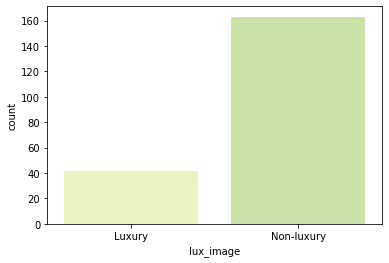

In [44]:
sns.set_palette(palette='YlGn')
sns.countplot(data=cars,x='lux_image')

<AxesSubplot:xlabel='lux_image', ylabel='price'>

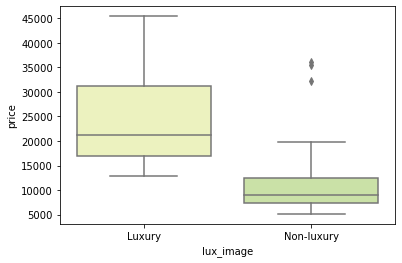

In [45]:
sns.boxplot(x='lux_image',y='price',data=cars,)

<AxesSubplot:xlabel='price', ylabel='Density'>

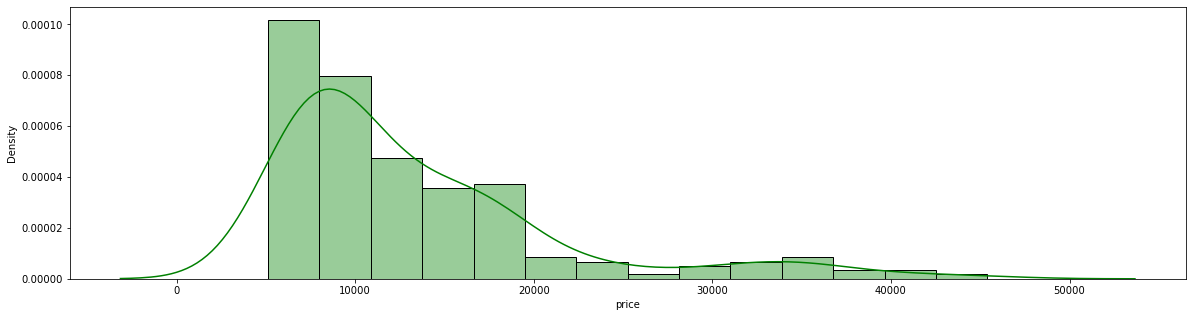

In [46]:
plt.figure(figsize=(20,5))
sns.histplot(data=cars,x='price',kde=True,stat="density", kde_kws=dict(cut=3), alpha=.4,color='green')

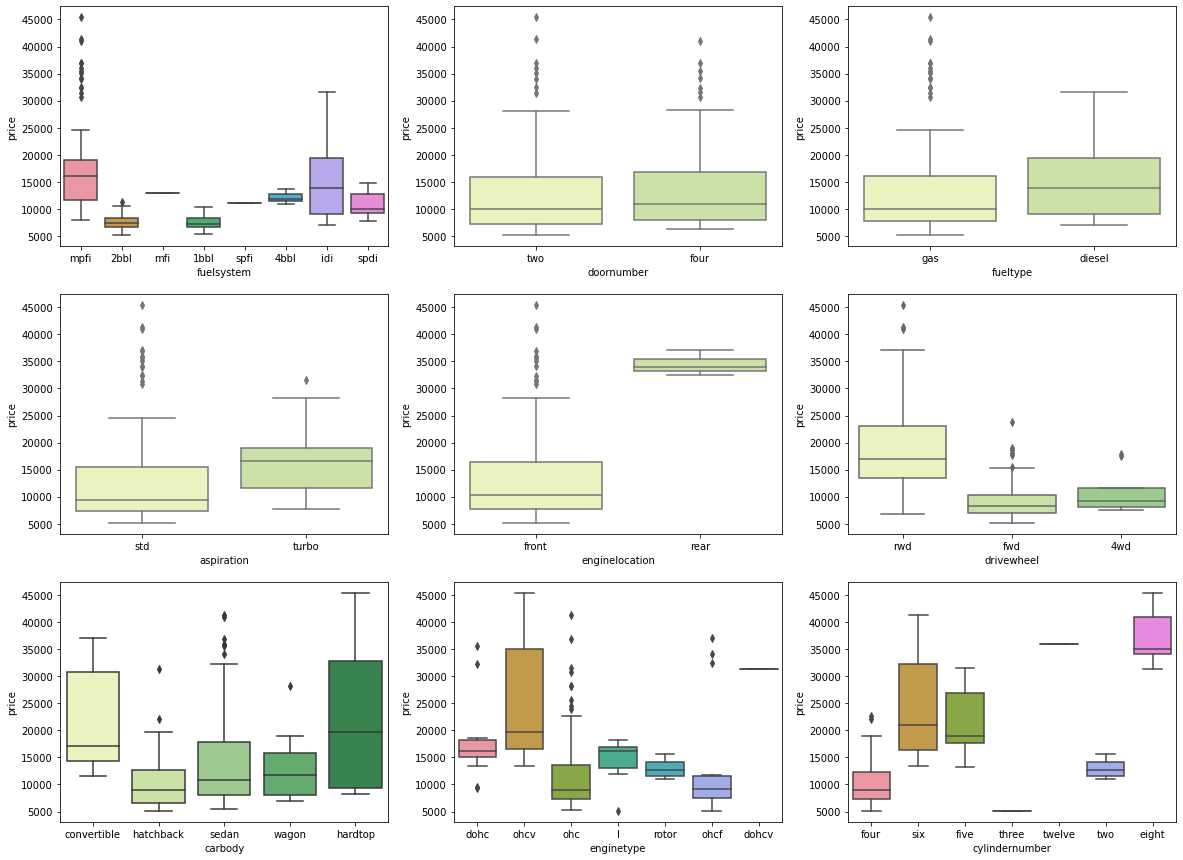

In [47]:
plt.figure(figsize=(20, 15))
plt.subplot(3,3,1)
sns.boxplot(x = 'fuelsystem', y = 'price', data = cars)
plt.subplot(3,3,2)
sns.boxplot(x = 'doornumber', y = 'price', data = cars)
plt.subplot(3,3,3)
sns.boxplot(x = 'fueltype', y = 'price', data = cars)
plt.subplot(3,3,4)
sns.boxplot(x = 'aspiration', y = 'price', data = cars)
plt.subplot(3,3,5)
sns.boxplot(x = 'enginelocation', y = 'price', data = cars)
plt.subplot(3,3,6)
sns.boxplot(x = 'drivewheel', y = 'price', data = cars)
plt.subplot(3,3,7)
sns.boxplot(x = 'carbody', y = 'price', data = cars)
plt.subplot(3,3,8)
sns.boxplot(x = 'enginetype', y = 'price', data = cars)
plt.subplot(3,3,9)
sns.boxplot(x = 'cylindernumber', y = 'price', data = cars)
plt.show()

<AxesSubplot:xlabel='fuelsystem', ylabel='price'>

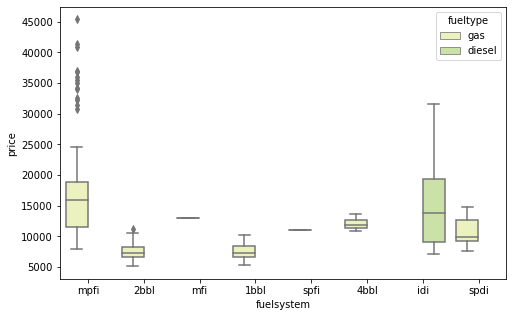

In [48]:
plt.figure(figsize=(8, 5))
sns.boxplot(x = 'fuelsystem', y = 'price', hue = 'fueltype', data = cars)

<AxesSubplot:xlabel='enginetype', ylabel='price'>

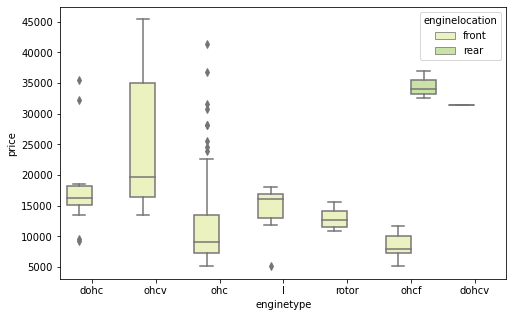

In [49]:
plt.figure(figsize=(8, 5))
sns.boxplot(x = 'enginetype', y = 'price', hue = 'enginelocation', data = cars)

<AxesSubplot:xlabel='carbody', ylabel='price'>

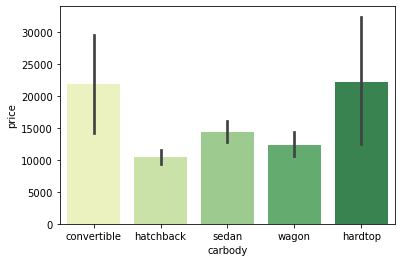

In [50]:
sns.barplot(x='carbody',y='price',data=cars)

<AxesSubplot:xlabel='lux_image', ylabel='horsepower'>

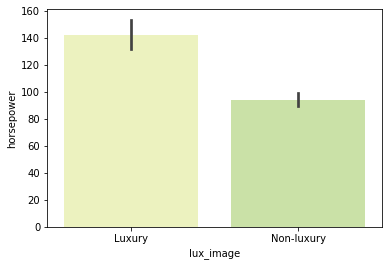

In [51]:
sns.barplot(x='lux_image',y='horsepower',data=cars)

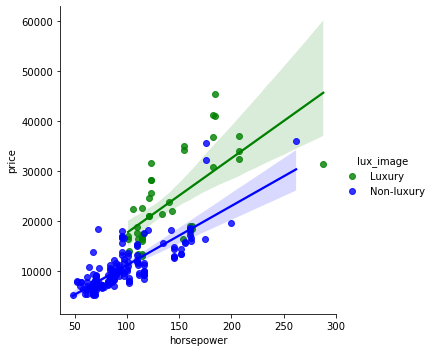

In [52]:
sns.lmplot(x='horsepower',y='price',data=cars,hue='lux_image',palette=['green','blue'])

<AxesSubplot:>

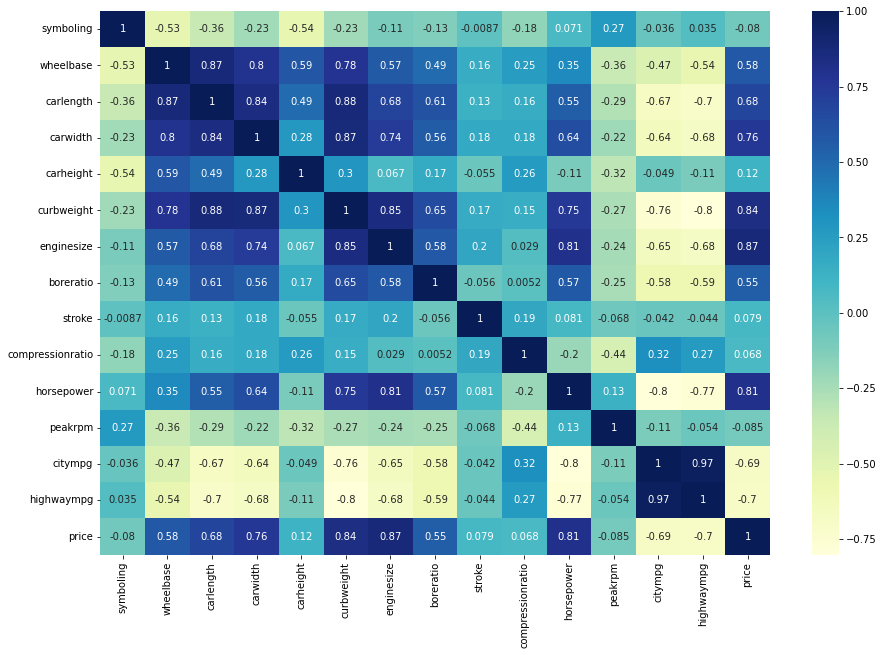

In [53]:
plt.subplots(figsize=(15,10))
sns.heatmap(cars.corr(),annot=True,cmap="YlGnBu")

# Assign dummy variables

In [54]:
cars['lux_image']= cars['lux_image'].map({'Non-luxury':0,'Luxury':1})
cars['fueltype'] = cars['fueltype'].map({'gas':0,'diesel':1})
cars['aspiration'] = cars['aspiration'].map({'std':0,'turbo':1})
cars['enginelocation'] = cars['enginelocation'].map({'front':0,'rear':1})

In [55]:
car_dummies = cars[['drivewheel','carbody','enginetype','cylindernumber']]
dummies = pd.get_dummies(car_dummies)
dummies['key']=1
cars['key']=1
cars = cars.drop(['drivewheel','carbody','enginetype','cylindernumber',
                  'symboling','CarName','fuelsystem','doornumber','wheelbase','carlength',
                  'carheight','boreratio','stroke','compressionratio','peakrpm','citympg',
                  'Car_brand','Car_name'], axis='columns')
cars = pd.merge(cars, dummies, on =['key'])
cars.head()

fueltype  aspiration  enginelocation  carwidth  curbweight  enginesize  \
0         0           0               0      64.1        2548         130   
1         0           0               0      64.1        2548         130   
2         0           0               0      64.1        2548         130   
3         0           0               0      64.1        2548         130   
4         0           0               0      64.1        2548         130   

   horsepower  highwaympg    price  lux_image  ...  enginetype_ohcf  \
0         111          27  13495.0          1  ...                0   
1         111          27  13495.0          1  ...                0   
2         111          27  13495.0          1  ...                0   
3         111          27  13495.0          1  ...                0   
4         111          27  13495.0          1  ...                0   

   enginetype_ohcv  enginetype_rotor  cylindernumber_eight  \
0                0                 0                     0   
1                0                 0                     0   
2                1                 0                     0   
3                0                 0                     0   
4                0                 0                     0   

   cylindernumber_five  cylindernumber_four  cylindernumber_six  \
0                    0                    1                   0   
1                    0                    1                   0   
2                    0                    0                   1   
3                    0                    1                   0   
4                    1                    0                   0   

   cylindernumber_three  cylindernumber_twelve  cylindernumber_two  
0                     0                      0                   0  
1                     0                      0                   0  
2                     0                      0                   0  
3                     0                      0                   0  
4                     0                      0                   0  

[5 rows x 33 columns]

<AxesSubplot:>

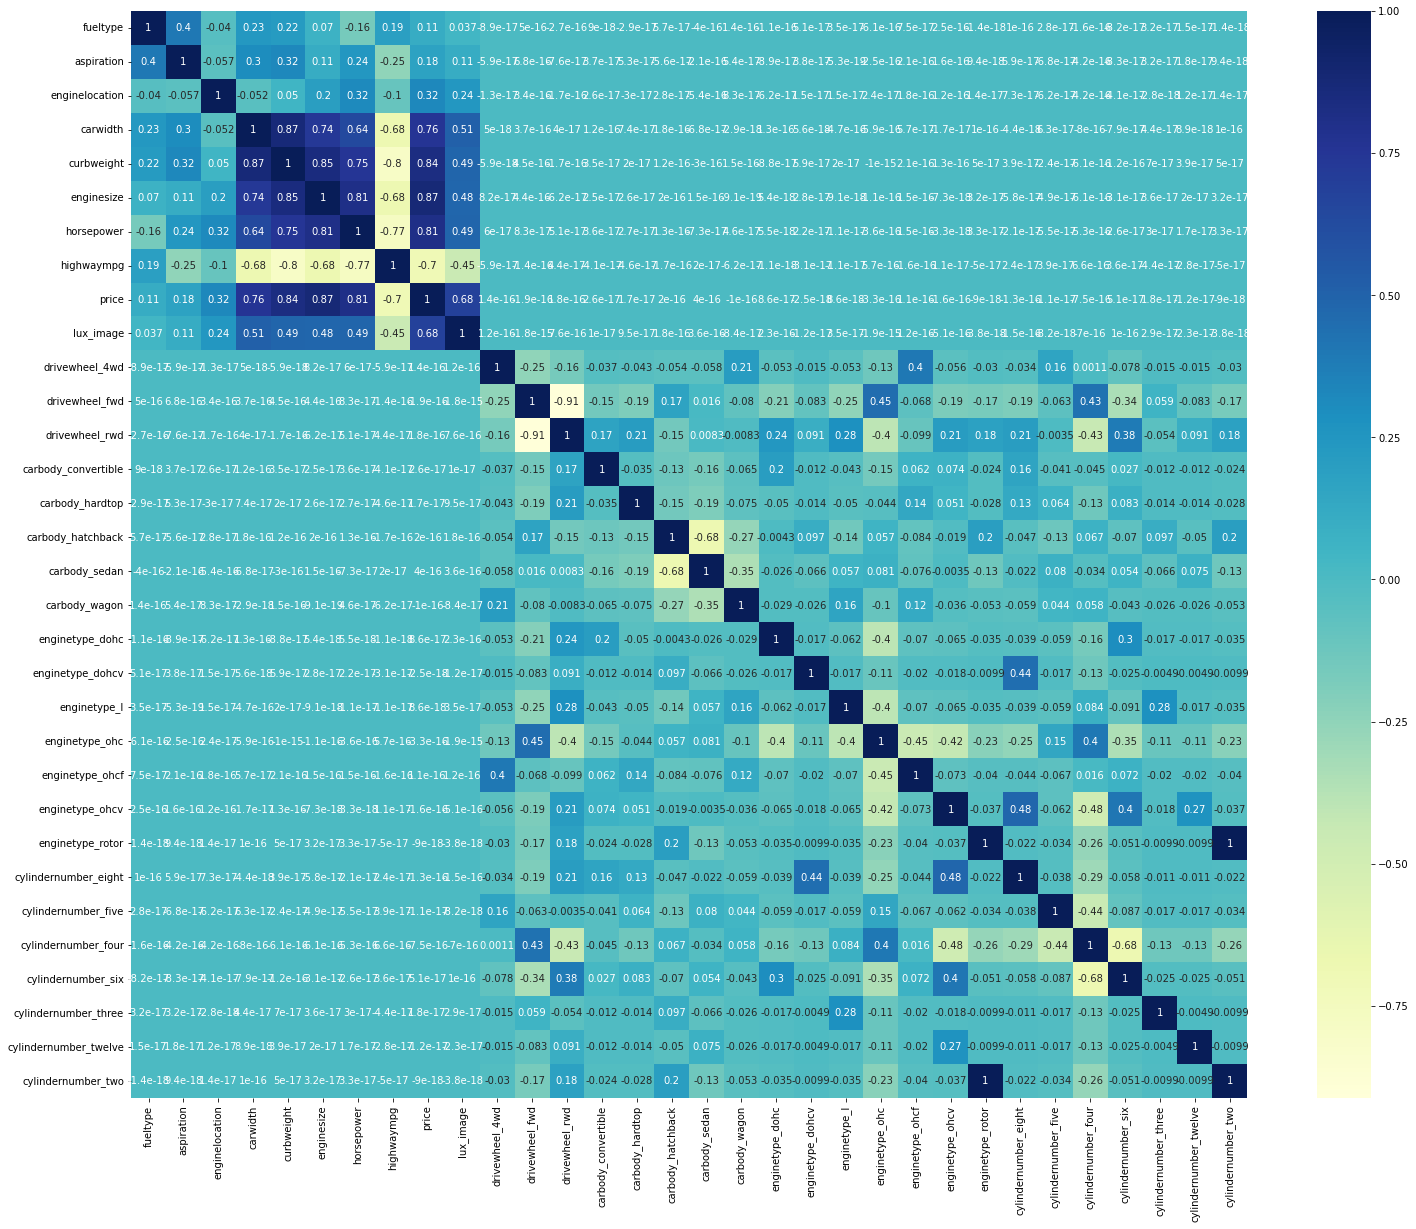

In [56]:
plt.subplots(figsize=(25,20))
sns.heatmap(cars.drop(['key'],axis=1).corr(),annot=True,cmap="YlGnBu")

# Splitting dataset

In [57]:
from sklearn.model_selection import train_test_split
x = cars[['fueltype','aspiration','enginelocation','curbweight','enginesize','horsepower','lux_image']]
y = cars['price']
x_train, x_test, y_train, y_test = train_test_split(x, 
                                                    y, 
                                                 test_size=0.2, 
                                                 random_state=111222)

In [58]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Fitting the models

In [59]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost
from sklearn.metrics import mean_squared_error
import math
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, explained_variance_score

In [60]:
def pred_accuracy(y_test, y_pred,x_test,model_name):
    
    

    r_squared_value  = r2_score(y_test, y_pred)
    mean_absolute_value = mean_absolute_error(y_test, y_pred)
    explained_variance = explained_variance_score(y_test, y_pred)

    metrics_dict = {
        'Model': model_name,
        'R squared value': r_squared_value,
        'mean absolute value': mean_absolute_value,
        'Explained variance': explained_variance 
    }

    metrics_df = pd.DataFrame([metrics_dict])
    return metrics_df

# Linear regression

In [61]:
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)
y_pred_lin_reg = lin_reg.predict(x_test)

In [62]:
model_name = 'Linear regression'
lin_reg_accuracy = pred_accuracy(y_test, y_pred_lin_reg,x_test,model_name)
lin_reg_accuracy

Model  R squared value  mean absolute value  Explained variance
0  Linear regression         0.893964           1894.76816            0.893989

In [63]:
def plot_residuals(y_test, y_pred):
    sns.set_palette(palette='mako')
    residuals = y_test - y_pred
    plt.scatter(y_pred, residuals)
    plt.axhline(y=0, color='r', linestyle='-')
    plt.title('Residual Plot')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.show()


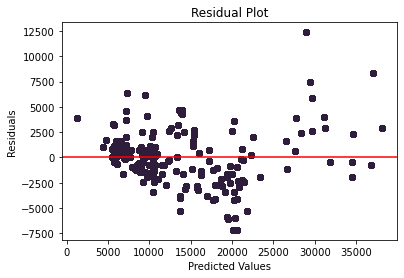

In [64]:
plot_residuals(y_test, y_pred_lin_reg)

In [65]:
import statsmodels.api as sm
x_train_with_const = sm.add_constant(x_train)
lin_reg = sm.OLS(y_train, x_train_with_const).fit()
print(lin_reg.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.893
Method:                 Least Squares   F-statistic:                 3.991e+04
Date:                Wed, 27 Mar 2024   Prob (F-statistic):               0.00
Time:                        22:57:27   Log-Likelihood:            -3.1215e+05
No. Observations:               33620   AIC:                         6.243e+05
Df Residuals:                   33612   BIC:                         6.244e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.327e+04     14.216    933.192      0.0

# Decision tree regressor

In [66]:
dec_tree = DecisionTreeRegressor()
dec_tree.fit(x_train,y_train)
y_pred_dec_tree = dec_tree.predict(x_test)

In [67]:
model_name = 'Decision tree regressor'
dec_tree_accuracy = pred_accuracy(y_test, y_pred_dec_tree,x_test,model_name)
dec_tree_accuracy

Model  R squared value  mean absolute value  \
0  Decision tree regressor          0.99821           108.529333   

   Explained variance  
0             0.99821

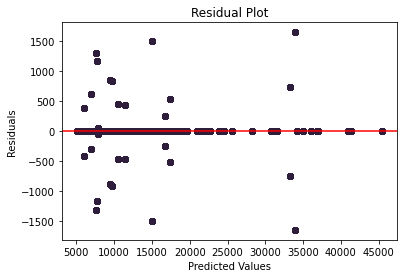

In [68]:
plot_residuals(y_test, y_pred_dec_tree)

# Random Forest regressor

In [69]:
rand_for = RandomForestRegressor()
rand_for.fit(x_train,y_train)
y_pred_rand_for = rand_for.predict(x_test)

In [70]:
model_name = 'Random Forest regressor'
rand_for_accuracy = pred_accuracy(y_test, y_pred_rand_for,x_test,model_name)
rand_for_accuracy

Model  R squared value  mean absolute value  \
0  Random Forest regressor          0.99821           108.518659   

   Explained variance  
0             0.99821

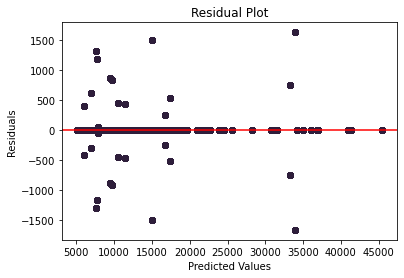

In [71]:
plot_residuals(y_test, y_pred_rand_for)

# XGBoost

In [72]:
xgb_boost =  xgboost.XGBRegressor()
xgb_boost.fit(x_train,y_train)
y_pred_xgb_boost = xgb_boost.predict(x_test)

In [73]:
model_name='XGB Regressor'
xgb_accuracy = pred_accuracy(y_test, y_pred_xgb_boost,x_test,model_name)
xgb_accuracy

Model  R squared value  mean absolute value  Explained variance
0  XGB Regressor          0.99821            110.40299             0.99821

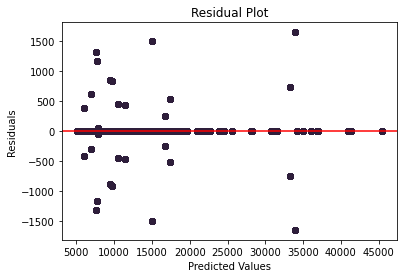

In [74]:
plot_residuals(y_test, y_pred_xgb_boost)

In [75]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(df):
    vif_data = pd.DataFrame()
    vif_data["Feature"] = df.columns
    vif_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(len(df.columns))]
    return vif_data


vif_result = calculate_vif(x)
print(vif_result)

          Feature        VIF
0        fueltype   2.066222
1      aspiration   2.027469
2  enginelocation   1.327131
3      curbweight  42.371551
4      enginesize  55.586667
5      horsepower  44.324789
6       lux_image   1.599617


# Hyperparameter tuning for decision tree regressor

In [76]:
dec_tree.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [77]:
params= {
           "max_depth" : [1,3,5,7,10],
           "min_samples_leaf":[1,2,3,4,5],
           "max_leaf_nodes":[None,10,20,30,50],
         "criterion": ["mse"],
        }


In [78]:
from sklearn.model_selection import RandomizedSearchCV
tunedmodel=RandomizedSearchCV(dec_tree,param_distributions=params)

In [79]:
tunedmodel.fit(x_train,y_train)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\tree\_classes.py:359: FutureWarning:

Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.

C:\Users\hp\anaconda3\lib\site-packages\sklearn\tree\_classes.py:359: FutureWarning:

Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.

C:\Users\hp\anaconda3\lib\site-packages\sklearn\tree\_classes.py:359: FutureWarning:

Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.

C:\Users\hp\anaconda3\lib\site-packages\sklearn\tree\_classes.py:359: FutureWarning:

Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.

C:\Users\hp\anaconda3\lib\site-packages\sklearn\tree\_classes.py:359: FutureWarning:

Criterion 'mse' was deprecated in v1.0 and will be rem

RandomizedSearchCV(estimator=DecisionTreeRegressor(),
                   param_distributions={'criterion': ['mse'],
                                        'max_depth': [1, 3, 5, 7, 10],
                                        'max_leaf_nodes': [None, 10, 20, 30,
                                                           50],
                                        'min_samples_leaf': [1, 2, 3, 4, 5]})

In [80]:
tunedmodel.best_params_

{'min_samples_leaf': 3,
 'max_leaf_nodes': 50,
 'max_depth': 10,
 'criterion': 'mse'}

In [81]:
DTR_model = DecisionTreeRegressor(min_samples_leaf=4,max_leaf_nodes=50, max_depth=7,criterion='mse',random_state=4)
DTR_model.fit( x_train, y_train) 
y_pred_dtr = DTR_model.predict(x_test)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\tree\_classes.py:359: FutureWarning:

Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.



In [82]:
model_name='Decision tree regressor after hyperparameter tuning'
DTR_accuracy = pred_accuracy(y_test, y_pred_dtr,x_test,model_name)
DTR_accuracy

Model  R squared value  \
0  Decision tree regressor after hyperparameter t...         0.985884   

   mean absolute value  Explained variance  
0           648.558593            0.985887

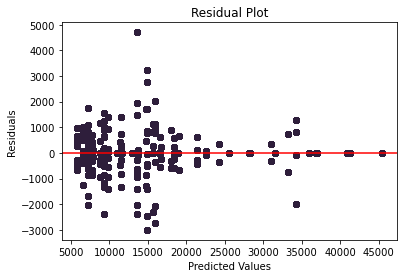

In [83]:
plot_residuals(y_test, y_pred_dtr)

In [84]:
#which model performs the best
best_model = pd.concat([lin_reg_accuracy, dec_tree_accuracy,rand_for_accuracy,xgb_accuracy])
best_model

Model  R squared value  mean absolute value  \
0        Linear regression         0.893964          1894.768160   
0  Decision tree regressor         0.998210           108.529333   
0  Random Forest regressor         0.998210           108.518659   
0            XGB Regressor         0.998210           110.402990   

   Explained variance  
0            0.893989  
0            0.998210  
0            0.998210  
0            0.998210

# Task 3 - Classification
dataset link: https://www.kaggle.com/datasets/architsharma01/loan-approval-prediction-dataset


In [85]:
loan_df = pd.read_csv('loan_approval_dataset.csv')
loan_df.head()

loan_id   no_of_dependents      education  self_employed   income_annum  \
0        1                  2       Graduate             No        9600000   
1        2                  0   Not Graduate            Yes        4100000   
2        3                  3       Graduate             No        9100000   
3        4                  3       Graduate             No        8200000   
4        5                  5   Not Graduate            Yes        9800000   

    loan_amount   loan_term   cibil_score   residential_assets_value  \
0      29900000          12           778                    2400000   
1      12200000           8           417                    2700000   
2      29700000          20           506                    7100000   
3      30700000           8           467                   18200000   
4      24200000          20           382                   12400000   

    commercial_assets_value   luxury_assets_value   bank_asset_value  \
0                  17600000              22700000            8000000   
1                   2200000               8800000            3300000   
2                   4500000              33300000           12800000   
3                   3300000              23300000            7900000   
4                   8200000              29400000            5000000   

   loan_status  
0     Approved  
1     Rejected  
2     Rejected  
3     Rejected  
4     Rejected

In [86]:
loan_df.isnull().sum()

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

In [87]:
loan_df[' education'].unique()
loan_df[' self_employed'].unique()
loan_df[' loan_status'].unique()

array([' Approved', ' Rejected'], dtype=object)

In [88]:
def clean (a):
    if a == b:
        return 1
    else:
        return 0

In [89]:
b = ' Graduate'
loan_df[' education'] = loan_df[' education'].apply(clean)

In [90]:
b = ' Yes'
loan_df[' self_employed'] = loan_df[' self_employed'].apply(clean)

In [91]:
b = ' Approved'
loan_df[' loan_status'] = loan_df[' loan_status'].apply(clean)

In [92]:
loan_df.head()

loan_id   no_of_dependents   education   self_employed   income_annum  \
0        1                  2           1               0        9600000   
1        2                  0           0               1        4100000   
2        3                  3           1               0        9100000   
3        4                  3           1               0        8200000   
4        5                  5           0               1        9800000   

    loan_amount   loan_term   cibil_score   residential_assets_value  \
0      29900000          12           778                    2400000   
1      12200000           8           417                    2700000   
2      29700000          20           506                    7100000   
3      30700000           8           467                   18200000   
4      24200000          20           382                   12400000   

    commercial_assets_value   luxury_assets_value   bank_asset_value  \
0                  17600000              22700000            8000000   
1                   2200000               8800000            3300000   
2                   4500000              33300000           12800000   
3                   3300000              23300000            7900000   
4                   8200000              29400000            5000000   

    loan_status  
0             1  
1             0  
2             0  
3             0  
4             0

# EDA

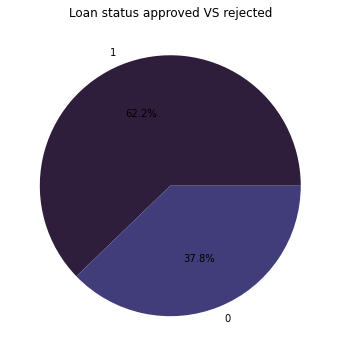

In [93]:
plt.figure(figsize = (6,6))
plt.pie(loan_df[' loan_status'].value_counts(),labels = loan_df[' loan_status'].unique(),autopct='%1.1f%%')
plt.title("Loan status approved VS rejected")
plt.show()

<AxesSubplot:xlabel=' education', ylabel='count'>

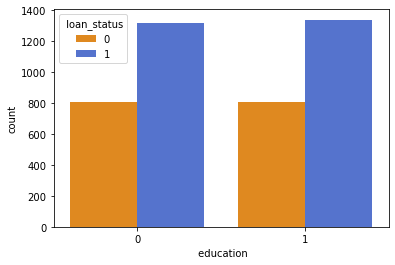

In [96]:
sns.countplot(x = ' education',hue = ' loan_status', data = loan_df,palette=['darkorange','royalblue'])

<AxesSubplot:xlabel=' self_employed', ylabel='count'>

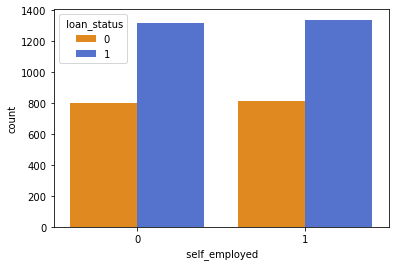

In [97]:
sns.countplot(x = ' self_employed',hue = ' loan_status', data = loan_df,palette=['darkorange','royalblue'])

In [98]:
loan_df[' no_of_dependents'].unique()

array([2, 0, 3, 5, 4, 1], dtype=int64)

<AxesSubplot:xlabel=' no_of_dependents', ylabel='count'>

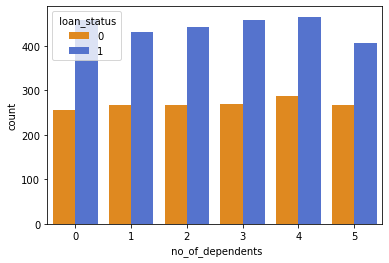

In [100]:
sns.countplot(x = ' no_of_dependents',hue = ' loan_status', data = loan_df,palette=['darkorange','royalblue'])

In [101]:
#grouping cibil score values into ranges based on performance
def cib_score_perf(a):
    if a>=750 and a<=900:
        return "Excellent"
    elif a>=650 and a < 750:
        return "Good"
    elif a >=500 and a < 650:
        return "Average"
    else :
        return "Poor"
loan_df['cib_score_range'] = loan_df[' cibil_score'].apply(cib_score_perf)

<AxesSubplot:xlabel='cib_score_range', ylabel='count'>

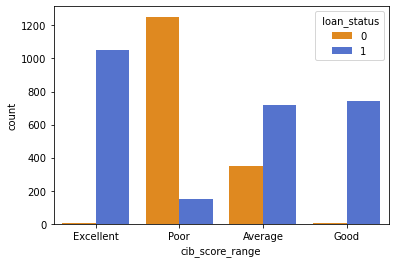

In [102]:
sns.countplot(x = 'cib_score_range',hue = ' loan_status', data = loan_df,palette=['darkorange','royalblue'])

In [103]:
loan_term = loan_df.groupby([' loan_term', ' loan_status'],as_index=False)[' loan_status'].value_counts()
loan_term

loan_term   loan_status  count
0            2             0     89
1            2             1    315
2            4             0     81
3            4             1    366
4            6             0    208
5            6             1    282
6            8             0    166
7            8             1    220
8           10             0    207
9           10             1    229
10          12             0    180
11          12             1    276
12          14             0    166
13          14             1    239
14          16             0    176
15          16             1    236
16          18             0    165
17          18             1    257
18          20             0    175
19          20             1    236

<AxesSubplot:xlabel=' loan_term', ylabel='count'>

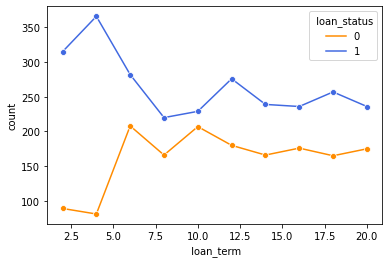

In [105]:
sns.lineplot(data=loan_term,x = ' loan_term',y='count',hue=' loan_status', marker='o',palette=['darkorange','royalblue'])

<AxesSubplot:xlabel=' income_annum', ylabel=' loan_amount'>

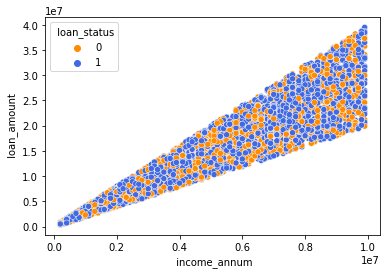

In [106]:
sns.scatterplot(x=' income_annum', y = ' loan_amount', data = loan_df,hue=' loan_status',palette=['darkorange','royalblue'])

In [107]:
#assume loan term is in years
#create DTI coloumn
loan_df['DTI_ratio'] = ((loan_df[' loan_amount']/loan_df[' loan_term']) / loan_df[' income_annum'])*100

In [108]:
def DTI_range(a):
    if a <= 35:
        return 'Good'
    elif a<= 49:
        return 'Could improve'
    else:
        return 'Insufficient'
loan_df['DTI_ratio_perf'] = loan_df['DTI_ratio'].apply(DTI_range)

<AxesSubplot:xlabel='DTI_ratio_perf', ylabel='count'>

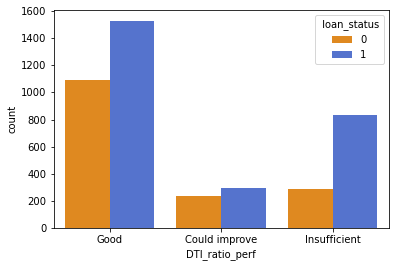

In [110]:
sns.countplot(x = 'DTI_ratio_perf',hue = ' loan_status', data = loan_df,palette=['darkorange','royalblue'])

<AxesSubplot:>

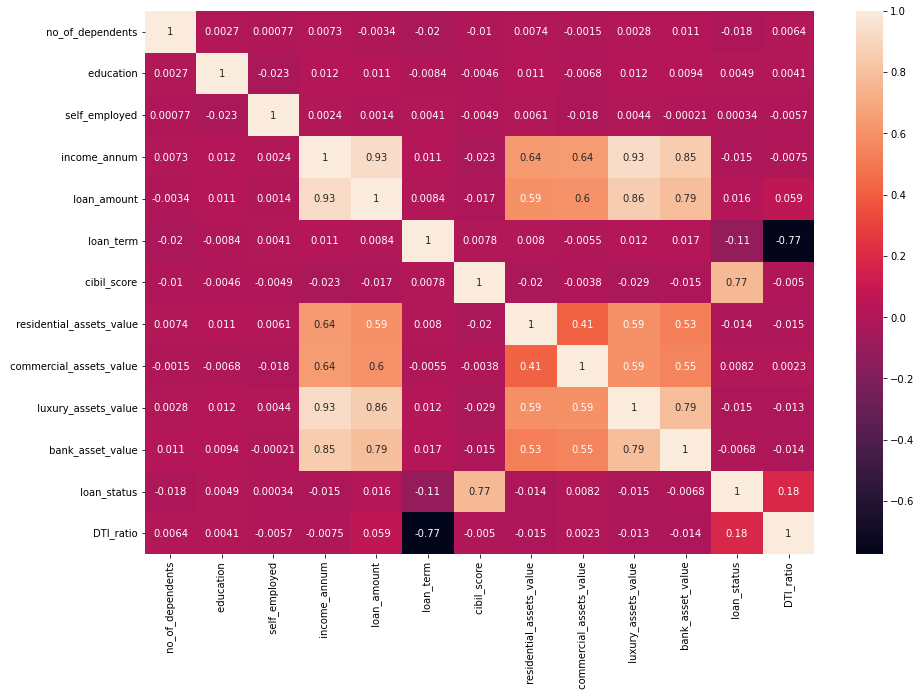

In [111]:
plt.subplots(figsize=(15,10))
sns.heatmap(loan_df.drop(['loan_id','DTI_ratio_perf'],axis=1).corr(),annot=True)

# Split dataset

In [112]:
target = loan_df[' loan_status']
features = loan_df[[' no_of_dependents',' income_annum',' loan_amount',' loan_term',
                    ' cibil_score',' residential_assets_value','DTI_ratio']]

In [113]:
from sklearn.model_selection import train_test_split

In [114]:
x_train, x_test, y_train, y_test = train_test_split(features, 
                                                    target, 
                                                    test_size=0.3, 
                                                    random_state=13545)

In [115]:
x_train.shape, x_test.shape

((2988, 7), (1281, 7))

In [116]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

def check_accuracy(y_test, pred,model):
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)

    metrics_dict = {
        'Model': model,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }

    metrics_df = pd.DataFrame([metrics_dict])
    return metrics_df

# Logistic regression

In [117]:
from sklearn.linear_model import LogisticRegression

In [118]:
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)
log_reg_predictions = log_reg.predict(x_test)

In [119]:
model='Logistic regression'
log_reg_accuracy = check_accuracy(y_test, log_reg_predictions,model)
log_reg_accuracy

Model  Accuracy  Precision    Recall  F1 Score
0  Logistic regression  0.730679   0.718243  0.937656  0.813413

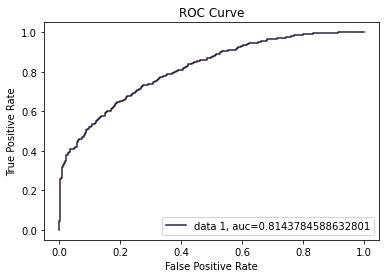

In [120]:
from sklearn import metrics
y_pred_proba = log_reg.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.title("ROC Curve")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.legend(loc=4)
plt.show()

Text(69.0, 0.5, 'Actual')

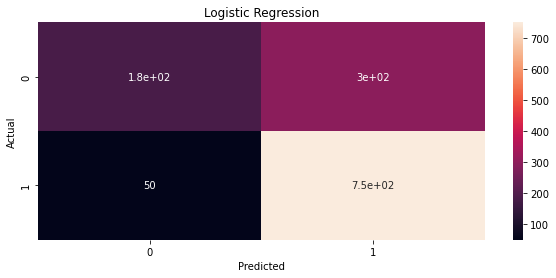

In [121]:
from sklearn.metrics import confusion_matrix

fig, ax = plt.subplots(figsize=(10, 4))
sns.heatmap(confusion_matrix(y_test,log_reg_predictions), annot=True).set_title('Logistic Regression')
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')

# Decision tree classifier

In [122]:
from sklearn.tree import DecisionTreeClassifier

dec_tree = DecisionTreeClassifier()
dec_tree.fit(x_train, y_train)
dec_tree_predictions = dec_tree.predict(x_test)

[Text(0.4342105263157895, 0.9615384615384616, 'X[4] <= 549.5\ngini = 0.471\nsamples = 2988\nvalue = [1134, 1854]'),
 Text(0.15789473684210525, 0.8846153846153846, 'X[6] <= 74.853\ngini = 0.18\nsamples = 1251\nvalue = [1126, 125]'),
 Text(0.10526315789473684, 0.8076923076923077, 'gini = 0.0\nsamples = 1060\nvalue = [1060, 0]'),
 Text(0.21052631578947367, 0.8076923076923077, 'X[3] <= 3.0\ngini = 0.452\nsamples = 191\nvalue = [66, 125]'),
 Text(0.10526315789473684, 0.7307692307692307, 'X[6] <= 149.528\ngini = 0.495\nsamples = 118\nvalue = [65, 53]'),
 Text(0.05263157894736842, 0.6538461538461539, 'gini = 0.0\nsamples = 65\nvalue = [65, 0]'),
 Text(0.15789473684210525, 0.6538461538461539, 'gini = 0.0\nsamples = 53\nvalue = [0, 53]'),
 Text(0.3157894736842105, 0.7307692307692307, 'X[5] <= 400000.0\ngini = 0.027\nsamples = 73\nvalue = [1, 72]'),
 Text(0.2631578947368421, 0.6538461538461539, 'X[5] <= 250000.0\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.21052631578947367, 0.576923076

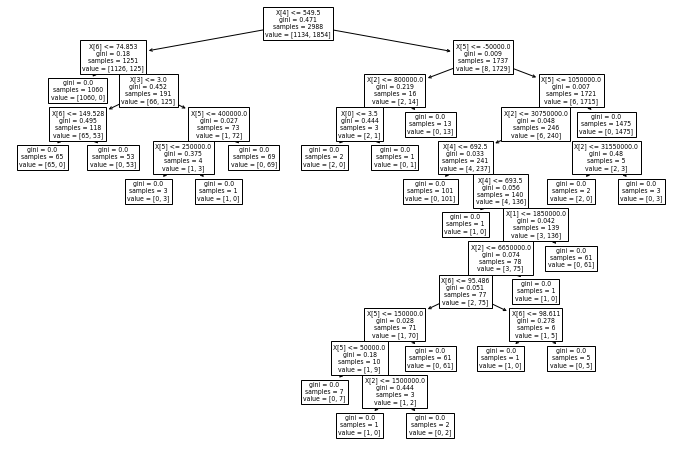

In [123]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(dec_tree.fit(x_train, y_train)) 

In [124]:
model='Decision Tree'
dec_tree_accuracy = check_accuracy(y_test, dec_tree_predictions,model)
dec_tree_accuracy

Model  Accuracy  Precision    Recall  F1 Score
0  Decision Tree  0.992194   0.991315  0.996259  0.993781

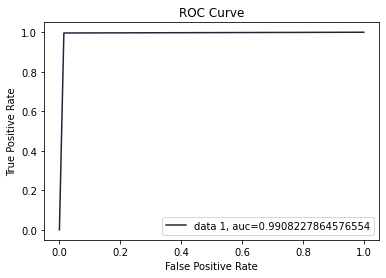

In [125]:
y_pred_proba = dec_tree.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.title("ROC Curve")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.legend(loc=4)
plt.show()

Text(69.0, 0.5, 'Actual')

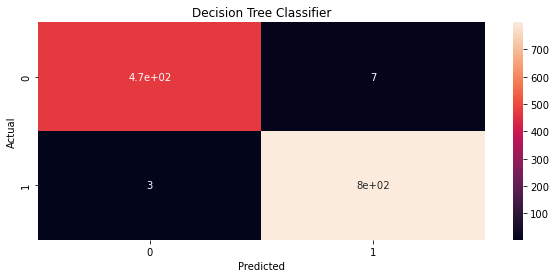

In [126]:
fig, ax = plt.subplots(figsize=(10, 4))
sns.heatmap(confusion_matrix(y_test,dec_tree_predictions), annot=True).set_title('Decision Tree Classifier')
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')

# Random forest classifier

In [127]:
from sklearn.ensemble import RandomForestClassifier
rand_for = RandomForestClassifier()
rand_for.fit(x_train,y_train)
rand_for_predictions = rand_for.predict(x_test)

In [128]:
model = "Random Forest Classifier"
rand_for_accuracy = check_accuracy(y_test, rand_for_predictions,model)
rand_for_accuracy

Model  Accuracy  Precision  Recall  F1 Score
0  Random Forest Classifier  0.992974   0.988903     1.0   0.99442

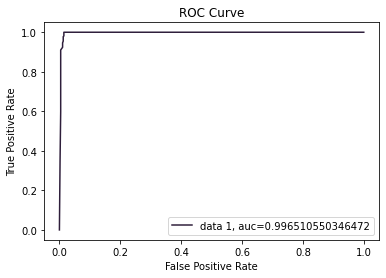

In [129]:
y_pred_proba = rand_for.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.title("ROC Curve")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.legend(loc=4)
plt.show()

Text(69.0, 0.5, 'Actual')

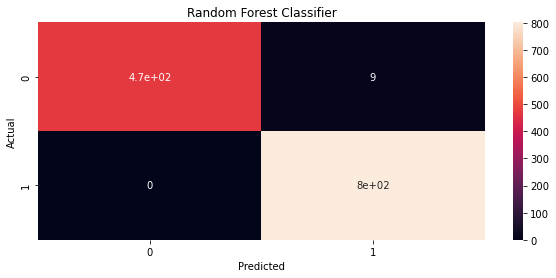

In [130]:
fig, ax = plt.subplots(figsize=(10, 4))
sns.heatmap(confusion_matrix(y_test,rand_for_predictions), annot=True).set_title('Random Forest Classifier')
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')

# Support vector classification

In [131]:
from sklearn.svm import SVC
SVC = SVC()
SVC.fit(x_train, y_train)
SVC_predictions = SVC.predict(x_test)

In [132]:
model = "SVC"
SVC_accuracy = check_accuracy(y_test, SVC_predictions, model)
SVC_accuracy

Model  Accuracy  Precision  Recall  F1 Score
0   SVC  0.626073   0.626073     1.0  0.770043

# Hyperparameter tuning for random forest classifier

In [133]:
from sklearn.metrics import classification_report 
print(classification_report(rand_for_predictions, y_test))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       470
           1       1.00      0.99      0.99       811

    accuracy                           0.99      1281
   macro avg       0.99      0.99      0.99      1281
weighted avg       0.99      0.99      0.99      1281



In [134]:
param_grid = { 
    'n_estimators': [25, 50, 100, 150,200], 
    'max_features': [10, 20, 30, None], 
    'max_depth': [3, 6, 9, 15], 
    'max_leaf_nodes': [3, 6, 9, 15], 
} 

In [135]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(RandomForestClassifier(), 
                           param_grid=param_grid) 
grid_search.fit(x_train, y_train) 
print(grid_search.best_estimator_) 

C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning:


1200 fits failed out of a total of 1600.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1200 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 450, in fit
    trees = Parallel(
  File "C:\Users\hp\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\hp\anaconda3\lib\site-packages\joblib\par

RandomForestClassifier(max_depth=6, max_features=None, max_leaf_nodes=6,
                       n_estimators=25)


In [136]:
model_grid = RandomForestClassifier(max_depth=6, max_leaf_nodes=6, n_estimators=25) 
model_grid.fit(x_train, y_train) 
rand_for_pred_grid = model_grid.predict(x_test) 
print(classification_report(rand_for_pred_grid, y_test)) 

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       454
           1       1.00      0.97      0.98       827

    accuracy                           0.98      1281
   macro avg       0.97      0.98      0.98      1281
weighted avg       0.98      0.98      0.98      1281



# Hyperparameter tuning for Decision tree classifier

In [137]:
print(classification_report(dec_tree_predictions, y_test))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       475
           1       1.00      0.99      0.99       806

    accuracy                           0.99      1281
   macro avg       0.99      0.99      0.99      1281
weighted avg       0.99      0.99      0.99      1281



In [138]:
param_grid = {
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [139]:
grid_search = GridSearchCV(dec_tree, 
                           param_grid=param_grid,  cv=5, scoring='accuracy') 
grid_search.fit(x_train, y_train) 
print(grid_search.best_estimator_) 

DecisionTreeClassifier(min_samples_leaf=2, min_samples_split=10)


In [140]:
model_grid = DecisionTreeClassifier(min_samples_leaf=2, min_samples_split=10) 
model_grid.fit(x_train, y_train) 
dec_tree_pred_grid = model_grid.predict(x_test)
print(classification_report(dec_tree_pred_grid, y_test))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       472
           1       1.00      0.99      1.00       809

    accuracy                           0.99      1281
   macro avg       0.99      1.00      0.99      1281
weighted avg       0.99      0.99      0.99      1281



In [142]:
model='Decision Tree after HPT'
dec_tree_accuracy_2 = check_accuracy(y_test, dec_tree_pred_grid,model)
dec_tree_accuracy_2

Model  Accuracy  Precision  Recall  F1 Score
0  Decision Tree after HPT  0.994536   0.991347     1.0  0.995655

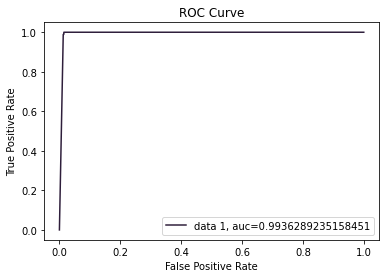

In [143]:
y_pred_proba = model_grid.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.title("ROC Curve")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.legend(loc=4)
plt.show()

Text(69.0, 0.5, 'Actual')

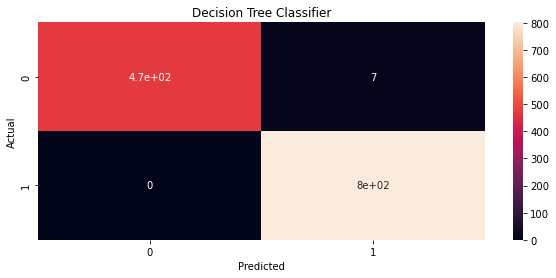

In [146]:
fig, ax = plt.subplots(figsize=(10, 4))
sns.heatmap(confusion_matrix(y_test,dec_tree_pred_grid), annot=True).set_title('Decision Tree Classifier')
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')

In [147]:
#model evaluation
best_model = pd.concat([log_reg_accuracy,dec_tree_accuracy,rand_for_accuracy,SVC_accuracy,dec_tree_accuracy_2])
best_model

Model  Accuracy  Precision    Recall  F1 Score
0       Logistic regression  0.730679   0.718243  0.937656  0.813413
0             Decision Tree  0.992194   0.991315  0.996259  0.993781
0  Random Forest Classifier  0.992974   0.988903  1.000000  0.994420
0                       SVC  0.626073   0.626073  1.000000  0.770043
0   Decision Tree after HPT  0.994536   0.991347  1.000000  0.995655